<a href="https://colab.research.google.com/github/Hyandhavi/Dogs-vs-Cats-Classification/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:07<00:00, 114MB/s]
100% 812M/812M [00:07<00:00, 112MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6774.jpg', 'dog.11631.jpg', 'dog.7043.jpg', 'cat.4083.jpg', 'cat.2167.jpg', 'dog.2517.jpg', 'cat.2207.jpg', 'dog.11963.jpg', 'cat.7369.jpg', 'cat.12279.jpg', 'cat.12148.jpg', 'cat.1251.jpg', 'cat.7820.jpg', 'cat.797.jpg', 'cat.9483.jpg', 'dog.5824.jpg', 'dog.11369.jpg', 'dog.2864.jpg', 'dog.888.jpg', 'cat.3904.jpg', 'dog.10682.jpg', 'dog.2241.jpg', 'cat.9152.jpg', 'dog.11909.jpg', 'cat.8972.jpg', 'dog.5090.jpg', 'dog.711.jpg', 'cat.8811.jpg', 'dog.9658.jpg', 'cat.3589.jpg', 'cat.5533.jpg', 'dog.11880.jpg', 'cat.6051.jpg', 'dog.2846.jpg', 'dog.1150.jpg', 'dog.182.jpg', 'dog.12199.jpg', 'dog.2917.jpg', 'cat.8710.jpg', 'dog.7421.jpg', 'cat.8453.jpg', 'cat.10223.jpg', 'cat.6425.jpg', 'cat.2695.jpg', 'dog.392.jpg', 'dog.1064.jpg', 'dog.6529.jpg', 'cat.7809.jpg', 'dog.839.jpg', 'dog.8595.jpg', 'cat.4265.jpg', 'cat.6091.jpg', 'cat.7864.jpg', 'cat.1195.jpg', 'dog.1202.jpg', 'dog.6555.jpg', 'cat.2357.jpg', 'cat.2262.jpg', 'dog.9580.jpg', 'dog.5586.jpg', 'dog.7579.jpg', 'dog.5407.jpg', 'do

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

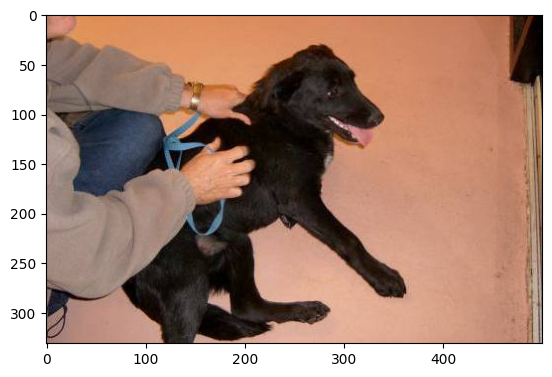

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.7043.jpg')
imgplt = plt.imshow(img)
plt.show()

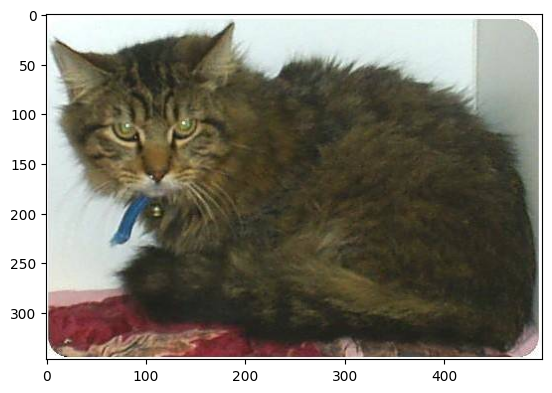

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4083.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
dog
cat
cat


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

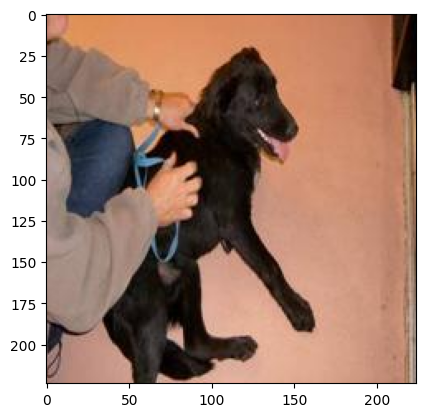

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.7043.jpg')
imgplt = plt.imshow(img)
plt.show()

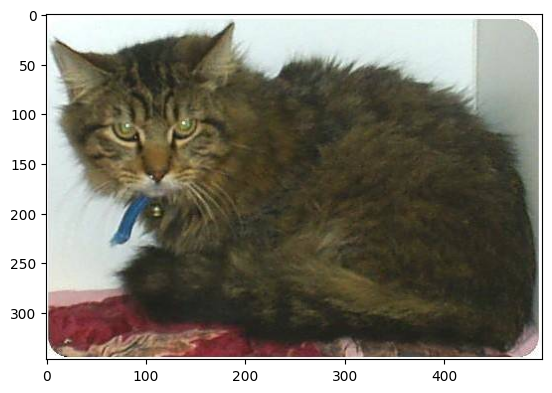

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4083.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
dog
cat
cat


FileExistsError: ignored

In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Creating labels for resized images of dogs and cats



Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.6774.jpg', 'dog.11631.jpg', 'dog.7043.jpg', 'cat.4083.jpg', 'cat.2167.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1026  974]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[155 157 157]
   [153 155 155]
   [151 153 153]
   ...
   [131 135 129]
   [137 144 137]
   [163 170 163]]

  [[155 157 157]
   [153 155 155]
   [151 153 153]
   ...
   [128 132 126]
   [134 141 134]
   [160 167 160]]

  [[156 158 158]
   [153 155 155]
   [151 153 153]
   ...
   [124 130 125]
   [132 138 133]
   [158 164 159]]

  ...

  [[128 137 147]
   [128 137 147]
   [128 137 147]
   ...
   [109 120 124]
   [104 115 119]
   [101 112 116]]

  [[125 134 144]
   [127 136 146]
   [129 138 148]
   ...
   [ 94 105 109]
   [ 85  96 100]
   [ 79  90  94]]

  [[123 132 142]
   [127 136 146]
   [131 140 150]
   ...
   [ 83  94  98]
   [ 71  82  86]
   [ 63  74  78]]]


 [[[118 114 103]
   [119 115 104]
   [121 117 106]
   ...
   [121 120 116]
   [123 122 118]
   [128 127 123]]

  [[123 119 108]
   [123 119 108]
   [123 119 108]
   ...
   [121 120 116]
   [121 120 116]
   [124 123 119]]

  [[127 123 112]
   [126 122 111]
   [124 120 109]
   ...
   [122 121 117]
   [119 118 114]
   [120 119

In [ ]:
type(dog_cat_images)


numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images



In [ ]:
# scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255



In [ ]:
print(X_train_scaled)

[[[[0.65882353 0.72941176 0.73333333]
   [0.63529412 0.70588235 0.70980392]
   [0.60392157 0.65490196 0.6627451 ]
   ...
   [0.7372549  0.74117647 0.70588235]
   [0.74901961 0.75294118 0.71764706]
   [0.75686275 0.76078431 0.7254902 ]]

  [[0.6745098  0.74509804 0.74901961]
   [0.67058824 0.72941176 0.7372549 ]
   [0.63921569 0.69019608 0.69803922]
   ...
   [0.7372549  0.74117647 0.70588235]
   [0.74509804 0.74901961 0.71372549]
   [0.75294118 0.75686275 0.72156863]]

  [[0.69803922 0.75686275 0.76470588]
   [0.69803922 0.75686275 0.76470588]
   [0.67843137 0.73333333 0.72941176]
   ...
   [0.7372549  0.74117647 0.70588235]
   [0.74509804 0.74901961 0.71372549]
   [0.74901961 0.75294118 0.71764706]]

  ...

  [[0.50588235 0.49411765 0.4745098 ]
   [0.50588235 0.49803922 0.46666667]
   [0.49803922 0.48627451 0.46666667]
   ...
   [0.98823529 0.99215686 1.        ]
   [0.98823529 0.99215686 1.        ]
   [0.98431373 0.98823529 1.        ]]

  [[0.45098039 0.43921569 0.40784314]
   [0.4

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.2326 - acc: 0.9094
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0742 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0547 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0427 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0366 - acc: 0.9887


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0671 - acc: 0.9775
Test Loss = 0.06705555319786072
Test Accuracy = 0.9775000214576721


Predictive System

Path of the image to be predicted: /content/Dog.jpg


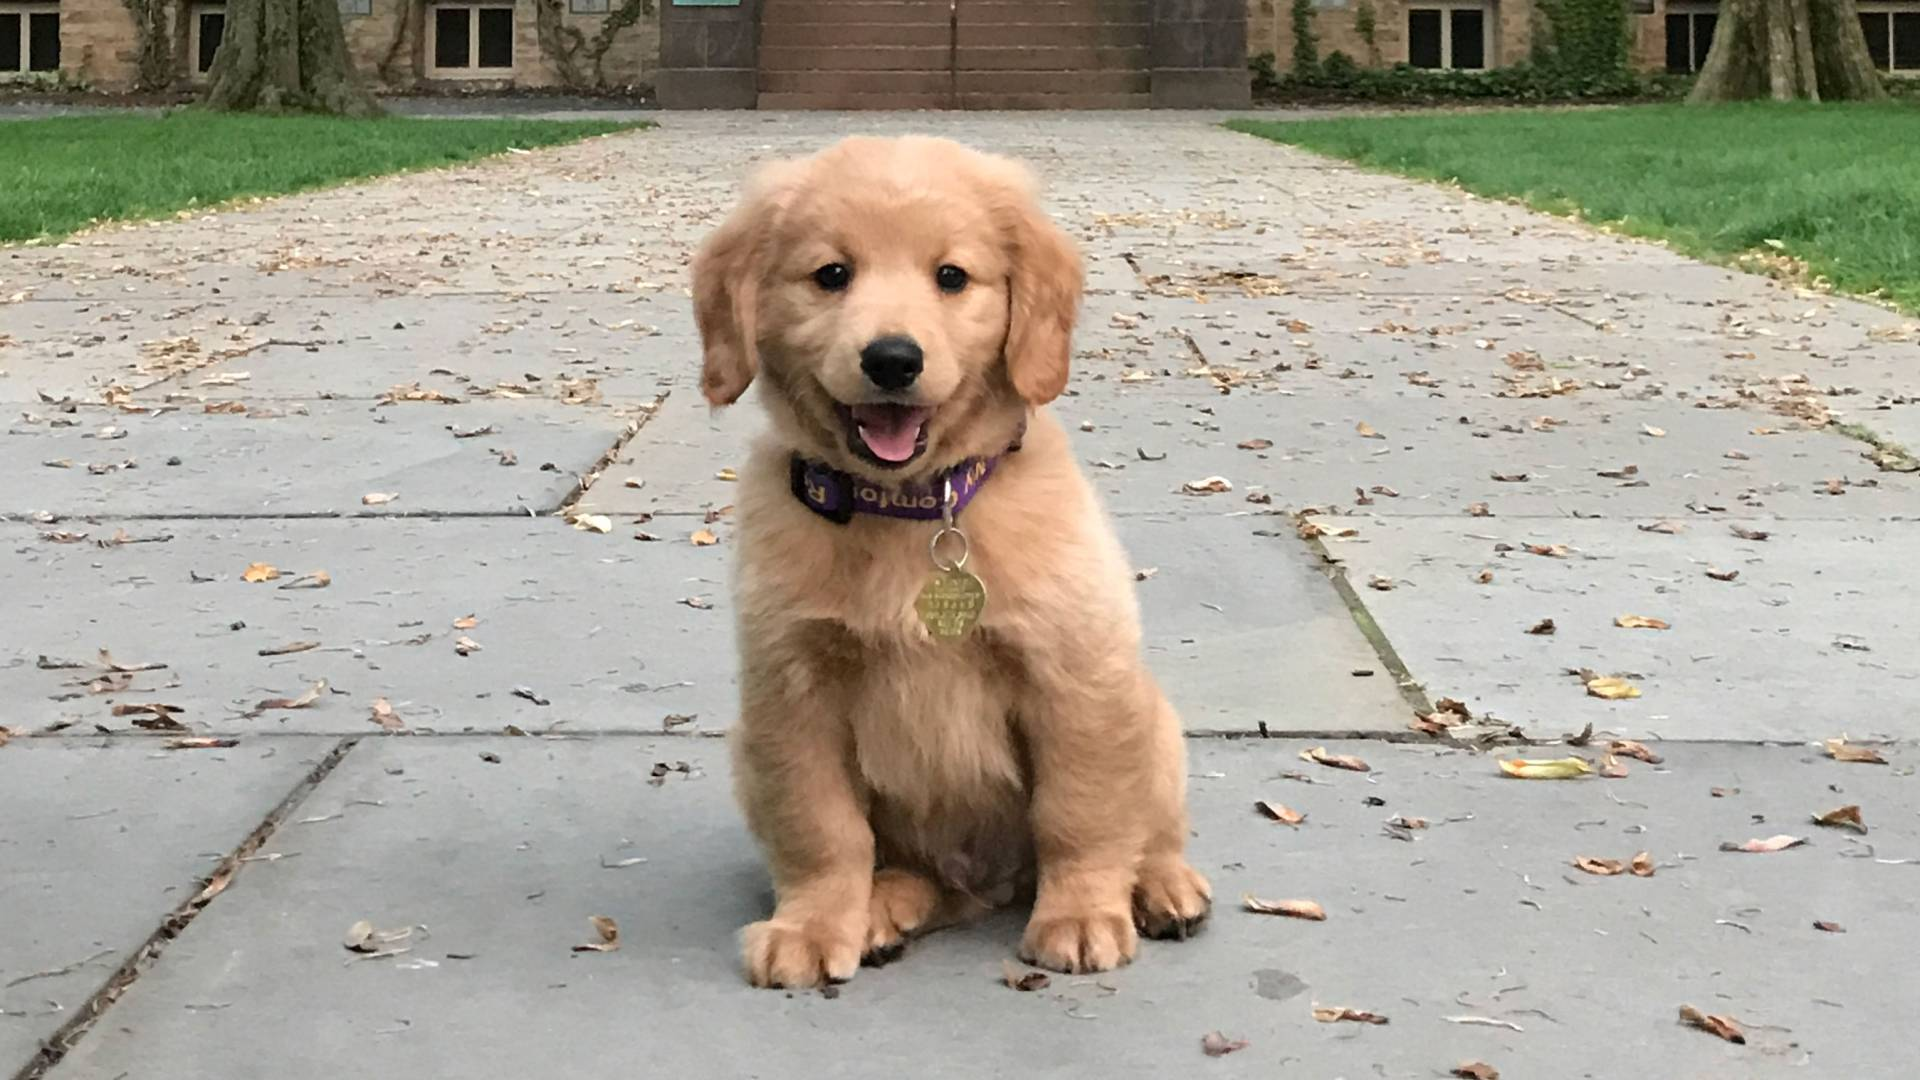

1/1 [==============================] - 1s 1s/step
[[-3.6163313  2.9505696]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


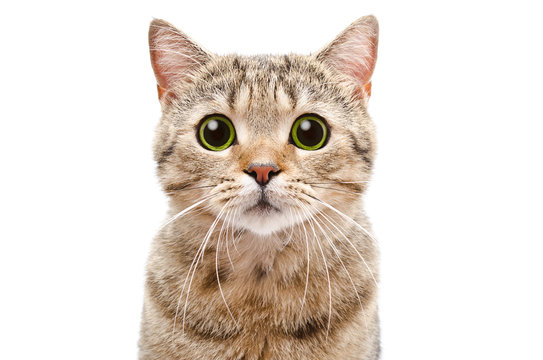

1/1 [==============================] - 0s 60ms/step
[[ 3.4533517 -4.108817 ]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')